# Countermeasures to Leaving Users

## 1. 개요

해당 프로젝트는 IBM사에서 제공한 가상의 통신사 데이터셋을 활용해 이탈 분석을 진행합니다.
온라인 서비스는 아니지만, 데이터를 활용해 고객 이탈분석을 진행하면서 차후 온라인 서비스에 응용될 수 있는 방안을 강구하고자 합니다.

데이터 전처리와 EDA를 통한 분석 방향 수립 과정과 다양한 관점에서의 이탈 분석, 그리고 예측 모델 구현과 모델 분석까지 종합적인 분석 프로세스를 다룹니다.
해당 프로젝트의 최종 목표는 이와 같은 종합적인 분석 프로세스를 바탕으로 이탈 대응전략을 구상해 제안하는 것 입니다.

## 2. 데이터 전처리 및 EDA

### 2-1. 데이터 확인

In [ ]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ROOT_PATH = '/content/drive/MyDrive/DDUA'
file_path = join(ROOT_PATH, 'data', 'Telco_customer_churn.xlsx')
data = pd.read_excel(file_path)
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
data['Count'].unique() # 중복 유저 기록 없음 확인

array([1])

### 2-2. 결측치 및 이상치 확인

In [ ]:
pd.isna(data).sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

#### 이상치 탐색

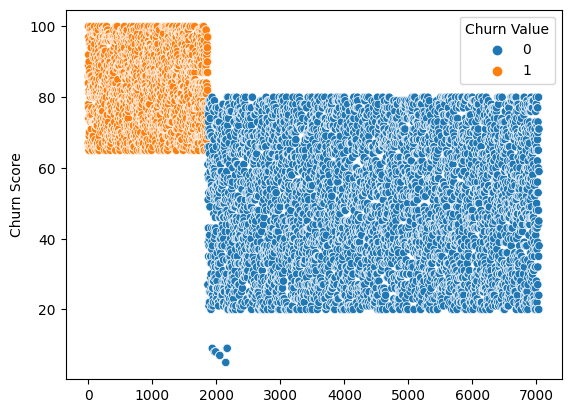

In [ ]:
# 고객 이탈 여부 시각화
import seaborn as sns
ax = sns.scatterplot(data=data, x=data.index, y='Churn Score', hue = "Churn Value")

In [ ]:
churn_users = data[data['Churn Value'] == 1]
staying_users = data[data['Churn Value'] == 0]
print("Number of users left:", len(churn_users), "\nNumber of users stay:", len(staying_users))
print("Max and Min of Left Users:", max(churn_users['Churn Score']), "&", min(churn_users['Churn Score']))
print("Max and Min of Staying Users (Include outliers):", max(staying_users['Churn Score']), "&", min(staying_users['Churn Score']))
print("Max and Min of Staying Users (Except outliers):", max(staying_users['Churn Score']), "&", min(staying_users[staying_users['Churn Score'] > 10]['Churn Score']))

Number of users left: 1869 
Number of users stay: 5174
Max and Min of Left Users: 100 & 65
Max and Min of Staying Users (Include outliers): 80 & 5
Max and Min of Staying Users (Except outliers): 80 & 20


**이상치 데이터 탐색**

In [ ]:
odd_points = data[data["Churn Score"] < 20]
odd_points.T

,1938,1975,1991,2054,2055,2148,2166,2171
CustomerID,4767-HZZHQ,3146-MSEGF,7554-NEWDD,9058-HRZSV,4522-AKYLR,7156-MXBJE,5876-QMYLD,7606-BPHHN
Count,1,1,1,1,1,1,1,1
Country,United States,United States,United States,United States,United States,United States,United States,United States
State,California,California,California,California,California,California,California,California
City,Redondo Beach,Paramount,Long Beach,Baldwin Park,Chino Hills,San Diego,Earp,La Quinta
Zip Code,90277,90723,90815,91706,91709,92127,92242,92253
Lat Long,"33.830453, -118.384565","33.897122, -118.164432","33.797638, -118.11662","34.098275, -117.967399","33.942895, -117.725644","33.017518, -117.118456","34.137742, -114.36514","33.695532, -116.310571"
Latitude,33.830453,33.897122,33.797638,34.098275,33.942895,33.017518,34.137742,33.695532
Longitude,-118.384565,-118.164432,-118.11662,-117.967399,-117.725644,-117.118456,-114.36514,-116.310571
Gender,Male,Female,Male,Female,Female,Female,Female,Male


In [ ]:
data_wo_outliers = data[data['Churn Score'] > 10]
len(data_wo_outliers) # 7043 - 8

7035

## 3. 분석

### 3-1. 고객 이탈 원인 분석

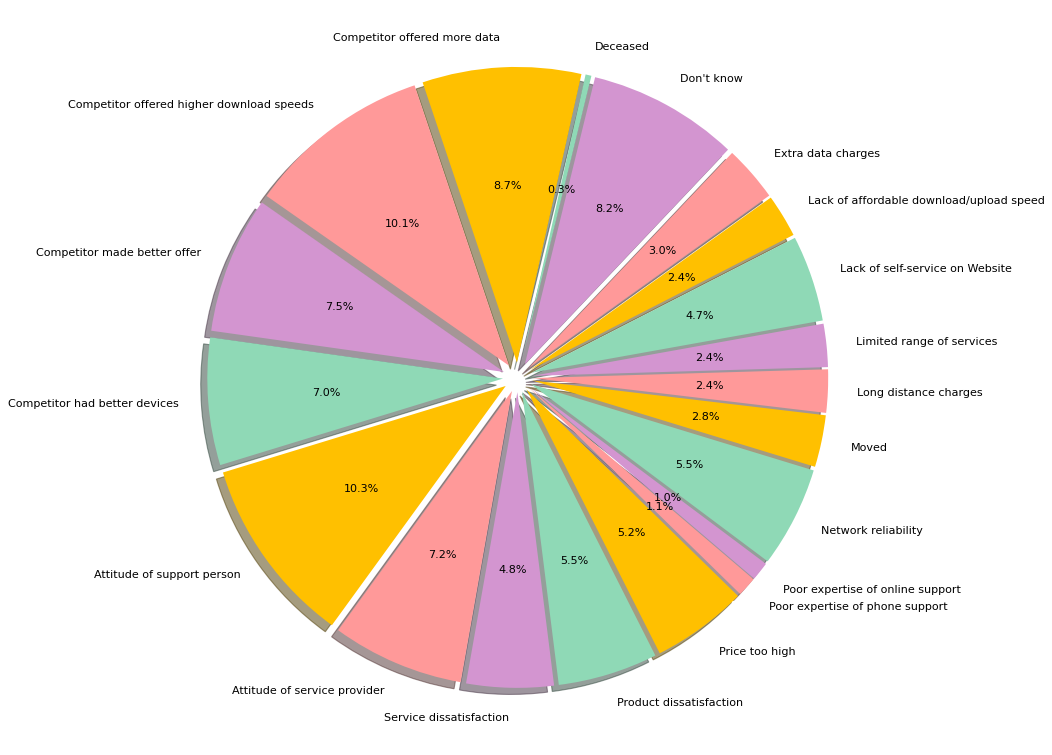

In [ ]:
groupby_reason = data.groupby('Churn Reason').sum()

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 12), dpi=80)

reason_count = groupby_reason['Count']

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode = [0.05 for i in range(20)]
plt.pie(reason_count, labels=reason_count.index, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [ ]:
# data['Churn Reason'].unique()

In [ ]:
Service = ['Service dissatisfaction', 'Lack of self-service on Website','Poor expertise of online support', 'Poor expertise of phone support', 'Attitude of service provider','Attitude of support person']
Price = ['Competitor made better offer','Price too high', 'Long distance charges', 'Extra data charges']
Infra = ['Competitor had better devices', 'Competitor offered higher download speeds', 'Competitor offered more data','Product dissatisfaction',  'Network reliability', 'Limited range of services', 'Lack of affordable download/upload speed']
Intangible = ['Moved', "Don't know", 'Deceased']

def func1(x):
  if x in Service:
    return 'service'
  elif x in Price:
    return 'price'
  elif x in Infra:
    return 'infra'
  elif x in Intangible:
    return ' intangible'
  else:
    return np.nan

data['Churn Reason Cat'] = data['Churn Reason'].map(lambda x: func1(x))

In [ ]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Churn Reason Cat
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,price
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,intangible
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,intangible
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,intangible
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,infra


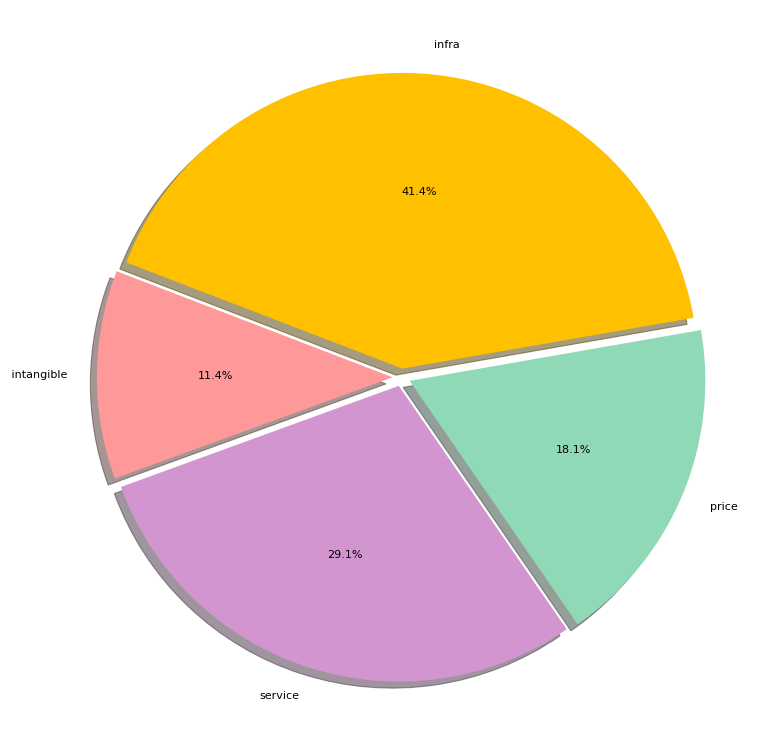

In [ ]:
groupby_reason_cat = data.groupby('Churn Reason Cat').sum()

figure(figsize=(20, 12), dpi=80)

reason_cat_count = groupby_reason_cat['Count']

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode = [0.03 for i in range(4)]
plt.pie(reason_cat_count, labels=reason_cat_count.index, autopct='%.1f%%', startangle=200, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

### 3-2. 이탈 위험에 따른 유저 분석

In [ ]:
left_users = data[data['Churn Score'] >= 80]
high_risk_users = data[data['Churn Score'].between(65, 79)]
low_risk_users = data[data['Churn Score'].between(20, 64)]

print("Number of (80 - 100):", len(left_users))
print("Number of(65 - 79):", len(high_risk_users))
print("Number of (20 - 64):", len(low_risk_users))

Number of (80 - 100): 1201
Number of(65 - 79): 2053
Number of (20 - 64): 3781


In [ ]:
def func2(x):
  if x >= 80:
    return '80-100'
  elif x >= 65:
    return '65-79'
  else:
    return '20-64'

data_wo_outliers['CS_interval'] = data_wo_outliers['Churn Score'].map(lambda x: func2(x))
data_wo_outliers.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,CS_interval
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,80-100
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,65-79
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,80-100
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,80-100
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,80-100


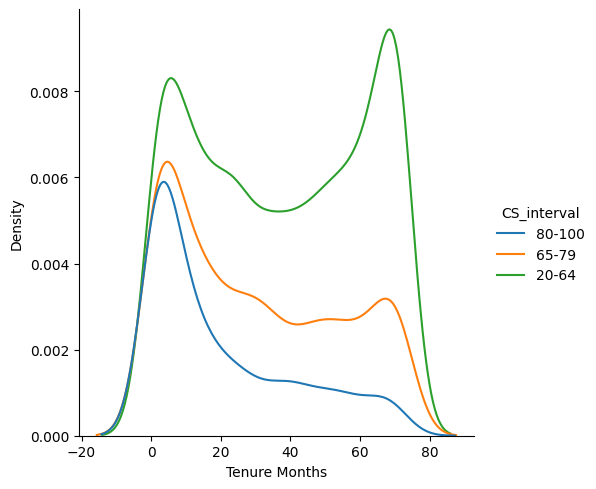

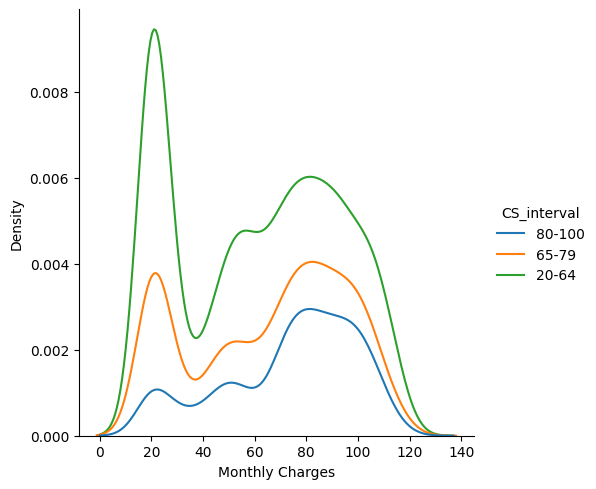

In [ ]:
sns.displot(data_wo_outliers, x="Tenure Months", hue="CS_interval", kind="kde")
sns.displot(data_wo_outliers, x="Monthly Charges", hue="CS_interval", kind="kde")

In [ ]:
experiment_data = data_wo_outliers.copy()
filter_cond1 = experiment_data['Tenure Months'] < 24
filter_cond2 = experiment_data['Monthly Charges'] > 60
filtered_T = experiment_data[filter_cond1 & filter_cond2]
filtered_F = experiment_data[~(filter_cond1 & filter_cond2)]
print("Average Churn Score of Users with Less than 24 Tenure Months and 60$ of Monthly Charges:", round(filtered_T["Churn Score"].mean(),2), "\nAnd else:", round(filtered_F["Churn Score"].mean(),2))
print("Ratio of Left Users with Less than 24 Tenure Months and 60$ of Monthly Charges:", round(filtered_T['Churn Value'].sum() / len(filtered_T), 2), "\nAnd else:", round(filtered_F['Churn Value'].sum() / len(filtered_F), 2))

Average Churn Score of Users with Less than 24 Tenure Months and 60$ of Monthly Charges: 68.24 
And else: 56.06
Ratio of Left Users with Less than 24 Tenure Months and 60$ of Monthly Charges: 0.57 
And else: 0.18


In [ ]:
grp_internet_T = filtered_T.groupby('Internet Service').sum()['Count']
grp_internet_F = filtered_F.groupby('Internet Service').sum()['Count']
pd.concat([grp_internet_T, grp_internet_F], axis=1, keys=['High Risk of Churn', 'Else'])

,High Risk of Churn,Else
Internet Service,,
DSL,223.0,2195
Fiber optic,1336.0,1758
No,NaN,1523


In [ ]:
grp_phone_T = filtered_T.groupby('Phone Service').sum()['Count']
grp_phone_F = filtered_F.groupby('Phone Service').sum()['Count']
pd.concat([grp_phone_T, grp_phone_F], axis=1, keys=['High Risk of Churn', 'Else'])

,High Risk of Churn,Else
Phone Service,,
No,2,680
Yes,1557,4796


In [ ]:
grp_pb_T = filtered_T.groupby('Paperless Billing').sum()['Count']
grp_pb_F = filtered_F.groupby('Paperless Billing').sum()['Count']
pd.concat([grp_pb_T, grp_pb_F], axis=1, keys=['High Risk of Churn', 'Else'])

,High Risk of Churn,Else
Paperless Billing,,
No,386,2481
Yes,1173,2995


In [ ]:
grp_pm_T = filtered_T.groupby('Payment Method').sum()['Count']
grp_pm_F = filtered_F.groupby('Payment Method').sum()['Count']
pd.concat([grp_pm_T, grp_pm_F], axis=1, keys=['High Risk of Churn', 'Else'])

,High Risk of Churn,Else
Payment Method,,
Bank transfer (automatic),212,1330
Credit card (automatic),173,1346
Electronic check,937,1426
Mailed check,237,1374


In [ ]:
grp_contract_T = filtered_T.groupby('Contract').sum()['Count']
grp_contract_F = filtered_F.groupby('Contract').sum()['Count']
pd.concat([grp_contract_T, grp_contract_F], axis=1, keys=['High Risk of Churn', 'Else'])

,High Risk of Churn,Else
Contract,,
Month-to-month,1466,2406
One year,76,1395
Two year,17,1675


### 3-3. 개인정보에 따른 서비스 이용 분석

In [ ]:
male = data_wo_outliers[data_wo_outliers['Gender'] == 'Male']
female = data_wo_outliers[data_wo_outliers['Gender'] == 'Female']
senior = data_wo_outliers[data_wo_outliers['Senior Citizen'] == 'Yes']
non_senior = data_wo_outliers[data_wo_outliers['Senior Citizen'] == 'No']
married = data_wo_outliers[data_wo_outliers['Partner'] == 'Yes']
single = data_wo_outliers[data_wo_outliers['Partner'] == 'No']
w_child = data_wo_outliers[data_wo_outliers['Dependents'] == 'Yes']
wo_child = data_wo_outliers[data_wo_outliers['Dependents'] == 'No']

senior_married = senior[senior['Partner'] == 'Yes']
senior_single = senior[senior['Partner'] == 'No']
senior_w_child = senior[senior['Dependents'] == 'Yes']
senior_wo_child = senior[senior['Dependents'] == 'No']

In [ ]:
print(len(senior), len(non_senior), len(senior_married), len(senior_single), len(senior_w_child), len(senior_wo_child))

1139 5896 571 568 73 1066


#### Function to be collapsed

In [ ]:
def analysis(df):
  ret = {}
  ret["Average Tenure Months"] = round(df["Tenure Months"].mean(), 3)
  ret["Average Monthly Charges"] = round(df["Monthly Charges"].mean() ,3)
  # Internet Service
  try:
    DSL = df.groupby('Internet Service').sum()['Count']['DSL']
  except:
    DSL = 0
  try:
    Fiber = df.groupby('Internet Service').sum()['Count']['Fiber optic']
  except:
    Fiber = 0
  try:
    no_int = df.groupby('Internet Service').sum()['Count']['No']
  except:
    no_int = 0
  ret["Use Ratio of Internet Service"] = round((DSL + Fiber) / (DSL + Fiber + no_int), 3)
  ret["Use Ratio of Fiber-optics"] = round(Fiber / (DSL + Fiber), 3)
  # Phone Service
  try:
    phone_Y = df.groupby('Phone Service').sum()['Count']['Yes']
  except:
    phone_Y = 0
  try:
    phone_N = df.groupby('Phone Service').sum()['Count']['No']
  except:
    phone_N = 0
  ret["Use Ratio of Phone Service"] = round(phone_Y / (phone_Y + phone_N), 3)
  # Paperless Billing
  try:
    pb_N = df.groupby('Paperless Billing').sum()['Count']['No']
  except:
    pb_N = 0
  try:
    pb_Y = df.groupby('Paperless Billing').sum()['Count']['Yes']
  except:
    pb_Y = 0
  ret["Use Ratio of Paperless Billing"] = round(pb_Y / (pb_Y + pb_N), 3)
  # Contract Type
  try:
    mtm = df.groupby('Contract').sum()['Count']['Month-to-month']
  except:
    mtm = 0
  try:
    one_y = df.groupby('Contract').sum()['Count']['One year']
  except:
    one_y = 0
  try:
    two_y = df.groupby('Contract').sum()['Count']['Two year']
  except:
    two_y = 0
  ret["Ratio of Month-to-Month Contract"] = round(mtm / (mtm + one_y+ two_y), 3)
  ret["Average Churn Score"] = round(df["Churn Score"].mean(), 3)
  ret["Average CLTV"] = round(df["CLTV"].mean(), 3)
  return ret

#### Continued

In [ ]:
from itertools import chain
from collections import defaultdict

ls = [senior, non_senior, married, single, w_child, wo_child, senior_married, senior_single, senior_w_child, senior_wo_child]
final_dict = defaultdict(list)
Male = analysis(male)
Female = analysis(female)
for k, v in chain(Male.items(), Female.items()):
  final_dict[k].append(v)
for item in ls:
  dict_ = analysis(item)
  for k, v in dict_.items():
    final_dict[k].append(v)

In [ ]:
Analysis = pd.DataFrame(final_dict)
Analysis['Type'] = ['Male', 'Female', 'Senior', 'Non-senior', 'Married', 'Single', 'w/ child', 'wo/ child', 'senior_married', 'senior_single', 'senior_w_child', 'senior_wo_child']
Analysis

,Average Tenure Months,Average Monthly Charges,Use Ratio of Internet Service,Use Ratio of Fiber-optics,Use Ratio of Phone Service,Use Ratio of Paperless Billing,Ratio of Month-to-Month Contract,Average Churn Score,Average CLTV,Type
0,32.491,64.346,0.781,0.556,0.901,0.587,0.549,58.748,4392.032,Male
1,32.229,65.200,0.786,0.567,0.905,0.598,0.552,58.767,4408.183,Female
2,33.252,79.822,0.954,0.764,0.909,0.767,0.707,63.847,4388.415,Senior
3,32.189,61.860,0.751,0.512,0.902,0.559,0.520,57.774,4402.272,Non-senior
4,42.011,67.772,0.783,0.561,0.908,0.585,0.406,56.284,4568.436,Married
5,23.346,61.962,0.784,0.561,0.898,0.599,0.686,61.068,4242.688,Single
6,38.263,56.830,0.654,0.447,0.903,0.486,0.391,51.855,4525.645,w/ child
7,30.587,67.155,0.823,0.589,0.903,0.625,0.598,60.832,4362.267,wo/ child
8,41.354,82.753,0.953,0.776,0.911,0.774,0.604,60.909,4546.427,senior_married
9,25.107,76.876,0.956,0.751,0.907,0.761,0.810,66.801,4229.569,senior_single


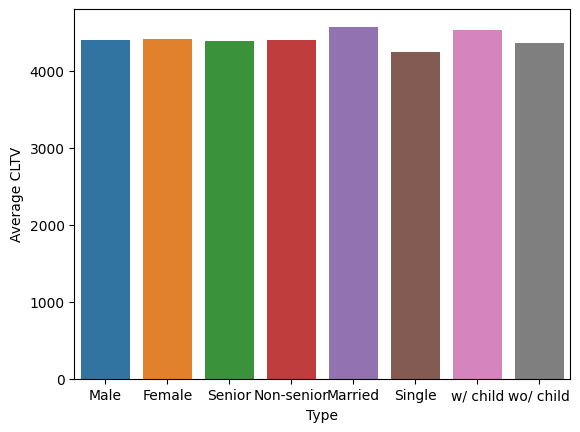

<Figure size 2000x800 with 0 Axes>

In [ ]:
sns.barplot(data=Analysis, x="Type", y="Average CLTV")
plt.figure(figsize=(20, 8))
plt.show()

## 4. 예측 모델링 및 사후 분석

In [ ]:
copy = data_wo_outliers.copy()
drop_cols = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'CS_interval']
dropped = copy.drop(drop_cols, axis='columns')

In [ ]:
churn_label = copy['Churn Value'] # 0: Staying 1: Left
churn_score = copy['Churn Score'] # Score 20 - 100

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dropped, churn_label, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape,)

(5628, 18) (5628,) (1407, 18) (1407,)


In [ ]:
# !pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat_features = X_train.columns[np.where(X_train.dtypes == object)[0]].values.tolist()
X_train[cat_features] = X_train[cat_features].astype(str)

model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, loss_function='Logloss', scale_pos_weight=2.77, verbose=False) # scale_pos_weight = sum_neg / sum_pos
model.fit(X_train, y_train, cat_features=cat_features)
preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, log_loss

preds_proba = model.predict_proba(X_test)

print('Accuracy : {:.3f}'.format(accuracy_score(y_test, preds)))
print('Precision : {:.3f}'.format(precision_score(y_test, preds)))
print('Recall : {:.3f}'.format(recall_score(y_test, preds)))
print('F1 Score: {:.3f}'.format(f1_score(y_test, preds)))
print('AUC : {:.3f}'.format(roc_auc_score(y_test, preds_proba[:, 1])))
print('Log Loss : {:.3f}'.format(log_loss(y_test,preds_proba[:, 1])))

Accuracy : 0.773
Precision : 0.570
Recall : 0.766
F1 Score: 0.654
AUC : 0.860
Log Loss : 0.444


In [ ]:
threshold = 0.7
preds_class = [1 if proba > threshold else 0 for proba in preds_proba[:,1]]

print('Accuracy : {:.3f}'.format(accuracy_score(y_test, preds_class)))
print('Precision : {:.3f}'.format(precision_score(y_test, preds_class)))
print('Recall : {:.3f}'.format(recall_score(y_test, preds_class)))
print('F1 Score: {:.3f}'.format(f1_score(y_test, preds_class)))

Accuracy : 0.810
Precision : 0.691
Recall : 0.580
F1 Score: 0.631


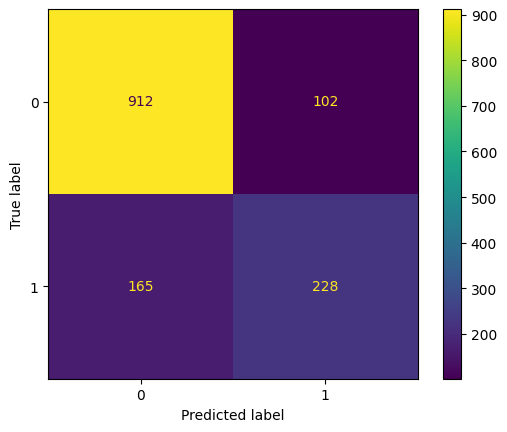

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, preds_class)
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
# !pip install shap

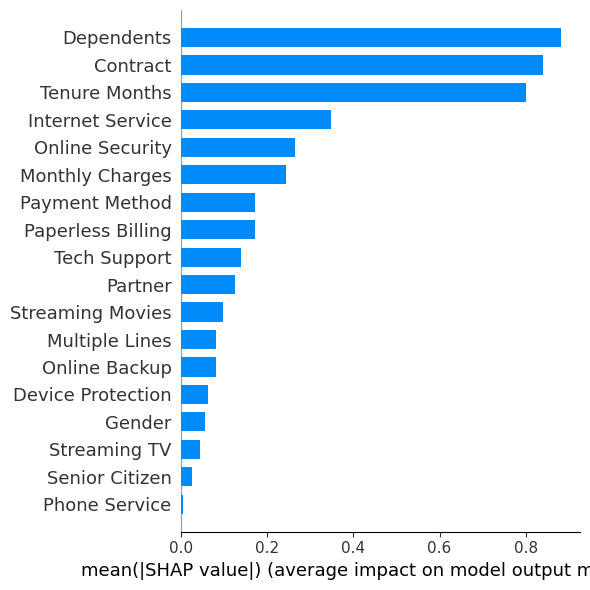

In [ ]:
import shap

explainercat = shap.TreeExplainer(model)
shap_values_cat_test = explainercat.shap_values(X_test)
shap_values_cat_train = explainercat.shap_values(X_train)
shap.summary_plot(shap_values_cat_train, X_train, plot_type="bar", plot_size=(6,6))

## Appendix. Some Experiments

### A. 이탈 점수 예측 모델

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dropped, churn_score, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape,)

(5628, 18) (5628,) (1407, 18) (1407,)


In [ ]:
from catboost import CatBoostRegressor

reg_model = CatBoostRegressor(iterations=2000, learning_rate=0.01, depth=4, loss_function='RMSE', verbose=False)
reg_model.fit(X_train, y_train, cat_features=cat_features)
y_pred = reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('r2_score : {:.3f}'.format(r2_score(y_test, y_pred)))
print('MAE : {:.3f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE : {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE : {:.3f}'.format(mean_squared_error(y_test, y_pred, squared=False)))

r2_score : 0.139
MAE : 16.475
MSE : 394.005
RMSE : 19.850


<Axes: xlabel='Churn Score', ylabel='Density'>

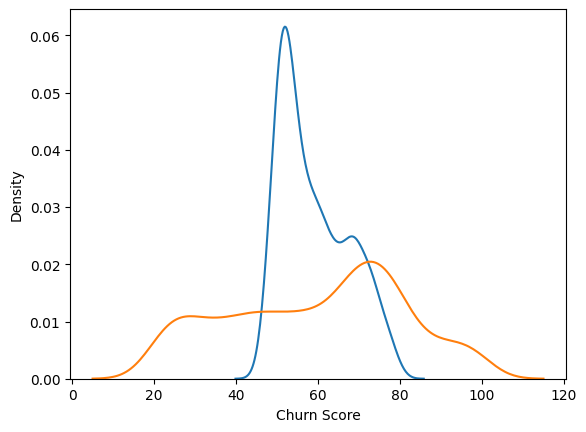

In [ ]:
sns.kdeplot(y_pred)
sns.kdeplot(y_test)

### B. 이탈 점수 구간 분류 모델

In [ ]:
sfm = data_wo_outliers.copy()
target = sfm['CS_interval']
sfm_dropped = sfm.drop(drop_cols, axis='columns')

In [ ]:
def func4(x):
  cnt = 0
  cols = ['Multiple Lines', 'Online Security',	'Online Backup',	'Device Protection',	'Tech Support',	'Streaming TV',	'Streaming Movies']
  for item in cols:
    if x[item] == 'Yes':
      cnt += 1
  return cnt
sfm_dropped['Additional Services'] = sfm_dropped.apply(lambda x: func4(x), axis=1)
sfm_dropped = sfm_dropped.drop(['Gender', 'Multiple Lines', 'Online Security',	'Online Backup',	'Device Protection',	'Tech Support',	'Streaming TV',	'Streaming Movies'], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_features = sfm_dropped.columns[np.where(sfm_dropped.dtypes == object)[0]].values.tolist()
sfm_dropped[cat_features] = sfm_dropped[cat_features].astype(str)

ohe = OneHotEncoder(sparse=False)

ohe.fit(sfm_dropped[cat_features])
ohe_columns = ohe.get_feature_names_out()
new_sfm = pd.DataFrame(ohe.transform(sfm_dropped[cat_features]), columns=ohe_columns)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = le.fit_transform(target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_sfm, label_encoded, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5628, 20) (5628,) (1407, 20) (1407,)


In [ ]:
# !pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)
print(X_resampled.shape)
print(y_resampled.shape)

(9177, 20)
(9177,)


In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_resampled, label=y_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 3,
}

num_round = 1000
bst = xgb.train(param, dtrain, num_round)
y_pred = bst.predict(dtest)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

y_prob = sfm_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
logloss = log_loss(y_test, y_prob)

print('Accuracy : {:.3f}'.format(accuracy))
print('Confusion Matrix : \n', conf_matrix)
print('Classification Report : \n', class_report)
print('Log Loss : {:.3f}'.format(logloss))

Accuracy : 0.489
Confusion Matrix : 
 [[450 122 150]
 [191  85 175]
 [ 51  30 153]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.65      0.62      0.64       722
           1       0.36      0.19      0.25       451
           2       0.32      0.65      0.43       234

    accuracy                           0.49      1407
   macro avg       0.44      0.49      0.44      1407
weighted avg       0.50      0.49      0.48      1407

Log Loss : 0.928


### C. 본 섹션 분류 모델 Upsampling 버전

In [ ]:
bcm = data_wo_outliers.copy()
target = bcm['Churn Value']
bcm_dropped = bcm.drop(drop_cols, axis='columns')

In [ ]:
def func4(x):
  cnt = 0
  cols = ['Multiple Lines', 'Online Security',	'Online Backup',	'Device Protection',	'Tech Support',	'Streaming TV',	'Streaming Movies']
  for item in cols:
    if x[item] == 'Yes':
      cnt += 1
  return cnt
bcm_dropped['Additional Services'] = bcm_dropped.apply(lambda x: func4(x), axis=1)
bcm_dropped = bcm_dropped.drop(['Gender', 'Multiple Lines', 'Online Security',	'Online Backup',	'Device Protection',	'Tech Support',	'Streaming TV',	'Streaming Movies'], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_features = bcm_dropped.columns[np.where(bcm_dropped.dtypes == object)[0]].values.tolist()
bcm_dropped[cat_features] = bcm_dropped[cat_features].astype(str)

ohe = OneHotEncoder(sparse=False)

ohe.fit(bcm_dropped[cat_features])
ohe_columns = ohe.get_feature_names_out()
new_bcm = pd.DataFrame(ohe.transform(bcm_dropped[cat_features]), columns=ohe_columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_bcm, target, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5628, 20) (5628,) (1407, 20) (1407,)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)
print(X_resampled.shape)
print(y_resampled.shape)

(8304, 20)
(8304,)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

model_bc = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42
)

model_bc.fit(X_resampled, y_resampled)
y_pred = model_bc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, log_loss

preds_proba = model_bc.predict_proba(X_test)

print('Accuracy : {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall : {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {:.3f}'.format(f1_score(y_test, y_pred)))
print('AUC : {:.3f}'.format(roc_auc_score(y_test, preds_proba[:, 1])))
print('Log Loss : {:.3f}'.format(log_loss(y_test,preds_proba[:, 1])))

Accuracy : 0.751
Precision : 0.538
Recall : 0.763
F1 Score: 0.631
AUC : 0.834
Log Loss : 0.497
